# **Welcome to Cancer Type Classification using Microbiome Data with Machine Learning**

### ***Summary***:

### ***Data origin***:
**Publication**:
**Github page**:

### ***Objectives of this notebook***:

## **1) Importing packages**

The code below will import the packages needed to load and pre-process the data before we can use them for our models.

In [80]:
import pandas as pd
import os 

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **2) Loading the datasets**

**a) Bacteria Genus Relative Abundance.txt**: Provides the unique sample of bacteria and the relative abundance of the respective genus in a given patient sample.

**b) Sample Metadata.txt**: Provides the metadata of the unique patient sample and information on sample type, cancer type and corresponding TCGA project.

Running the code below will give us a view of what the raw dataset looks like.

In [81]:
bacteria_genus_df = pd.read_csv("./dataset/Bacteria Genus Relative Abundance.txt", delimiter='\t')
meta_df = pd.read_csv("./dataset/Sample Metadata.txt", delimiter="\t")

## **3) Pre-process the datasets**

### **a) Bacteria Genus Relative Abundance**

In the raw dataset, the individual data point or sample, the patient sample, are columns, and the generas are rows. For this project, since we want to predict cancer prediction using microbiome data, we want to re-organize the data such that each row corresponds to an individual data point or sample, and each column represents a feature or attribute associated with the sample. This structure of the data allows the machine learning algorithms to learn patterns and re lationships between the feature and the target variable.

The code below will transpose the dataframe, set the first row as the column headers, and reset the index.

*Warning*: Running the cell below twice will revert to the original dataframe.

In [82]:
# Transpose the dataframe
bacteria_genus_df = bacteria_genus_df.T 
# # Set the first row as the column headers
bacteria_genus_df.columns = bacteria_genus_df.iloc[0]
# Drop the first row, as it's now the header
bacteria_genus_df = bacteria_genus_df[1:]
# Reset the index to default numeric index
bacteria_genus_df.reset_index(inplace=True)
# Rename "index" column to "name"
bacteria_genus_df.rename(columns={"index": "name"}, inplace=True)
# Set index column name to None
bacteria_genus_df = bacteria_genus_df.rename_axis(None, axis=1)

bacteria_genus_df

,name,Simonsiella,Treponema,Campylobacter,Helicobacter,Paracoccus,Comamonas,Pseudomonas,Xanthomonas,Agrobacterium,...,Merdibacter,Massilioclostridium,Criibacterium,Fournierella,Lagierella,Urmitella,Colibacter,Alterileibacterium,Negativibacillus,Duodenibacillus
0,TCGA-CG-5720-01A,0.0,0.0,0.0,0.89505,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TCGA-BR-4292-11A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TCGA-CN-4741-01A,0.0,0.0,0.01047,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TCGA-BR-6801-01A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TCGA-AA-A01P-11A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,TCGA-CG-5719-01A,0.0,0.0,0.0,0.106557,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
616,TCGA-CQ-5329-01A,0.0,0.175564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
617,TCGA-CQ-7068-01A,0.0,0.33506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,TCGA-CG-4455-01A,0.0,0.0,0.0,0.0,0.0,0.0,0.014781,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**How to read this dataset**
To read this dataset, let's take patient sample `TCGA-CG-5720-01A1` for example (index 0).
* In patient `TCGA-CG-5720-01A1`'s stool sample, 89.5% of bacteria is of the genus `Helicobacter`, and for the same patient, there is no `Simonsiella` or `Treponema`. 
* For patient `TCGA-CN-4741-01A`, 1% of their stool sample bacteria are `Campylobacter`. 

We are also given a list of generas that are kept in the paper. We will put this in a list object so we can filter out the unneeded generas later.

In [83]:
genera_list = [
    'Simonsiella', 'Treponema', 'Campylobacter', 'Helicobacter',
    'Paracoccus', 'Comamonas', 'Pseudomonas', 'Xanthomonas',
    'Agrobacterium', 'Bradyrhizobium', 'Acinetobacter', 'Neisseria',
    'Eikenella', 'Citrobacter', 'Enterobacter', 'Escherichia',
    'Klebsiella', 'Shigella', 'Haemophilus', 'Bacteroides',
    'Butyrivibrio', 'Porphyromonas', 'Prevotella', 'Roseburia',
    'Fusobacterium', 'Desulfovibrio', 'Megasphaera', 'Selenomonas',
    'Capnocytophaga', 'Peptostreptococcus', 'Ruminococcus', 'Staphylococcus',
    'Streptococcus', 'Enterococcus', 'Gemella', 'Atopobium',
    'Clostridium', 'Lactobacillus', 'Actinomyces', 'Bifidobacterium',
    'Corynebacterium', 'Eubacterium', 'Propionibacterium', 'Mycobacterium',
    'Gordonia', 'Mycoplasma', 'Thermosipho', 'Gardnerella',
    'Lachnospira', 'Veillonella', 'Leptotrichia', 'Rothia',
    'Kingella', 'Phascolarctobacterium', 'Coprococcus', 'Bilophila',
    'Dialister', 'Sutterella', 'Tissierella', 'Johnsonella',
    'Catonella', 'Filifactor', 'Abiotrophia', 'Lautropia',
    'Mitsuokella', 'Chryseobacterium', 'Centipeda', 'Eggerthella',
    'Cryptobacterium', 'Pedobacter', 'Mogibacterium', 'Coprobacillus',
    'Collinsella', 'Ensifer', 'Pseudoramibacter', 'Granulicatella',
    'Bulleidia', 'Solobacterium', 'Olsenella', 'Catenibacterium',
    'Anaeroglobus', 'Peptoniphilus', 'Anaerococcus', 'Sneathia',
    'Shuttleworthia', 'Varibaculum', 'Dorea', 'Tannerella',
    'Scardovia', 'Faecalibacterium', 'Ottowia', 'Alistipes',
    'Akkermansia', 'Marvinbryantia', 'Oribacterium', 'Odoribacter',
    'Subdoligranulum', 'Parabacteroides', 'Gulbenkiania', 'Barnesiella',
    'Aggregatibacter', 'Alloscardovia', 'Adlercreutzia', 'Oscillibacter',
    'Parvimonas', 'Blautia', 'Butyricimonas', 'Paraprevotella',
    'Pyramidobacter', 'Lachnoanaerobaculum', 'Stomatobaculum', 'Eggerthia',
    'Alloprevotella', 'Lelliottia', 'Coprobacter', 'Intestinimonas',
    'Fusicatenibacter', 'Lachnoclostridium', 'Tyzzerella', 'Faecalitalea',
    'Holdemanella', 'Mageeibacillus', 'Hungatella', 'Pseudopropionibacterium',
    'Peptoanaerobacter', 'Emergencia', 'Prevotellamassilia', 'Criibacterium',
    'Fournierella', 'Negativibacillus', 'Duodenibacillus'
]

### **b) Sample Metadata**

The raw dataset for the Sample Metadata doesn't need to be transposed. This dataset holds the information for our target variable, the "project" columns, which we will renamed to "label".

The code below simply renames the "Unnamed: 0" column to "name" to match the other dataset.

In [84]:
meta_df.rename(columns={"Unnamed: 0": "name"}, inplace=True)
meta_df

,name,case_id,Sample,biospecimen_sequence,composition,current_weight,days_to_collection,days_to_sample_procurement,freezing_method,initial_weight,...,percent_monocyte_infiltration,percent_necrosis,percent_neutrophil_infiltration,percent_normal_cells,percent_stromal_cells,percent_tumor_cells,percent_tumor_nuclei,project,ffpe_tumor_slide_submitted,HistologicalType
0,TCGA-CG-5720-01A,7c9ea4fa-4cbc-4941-945a-e531e1d48304,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,NaN,0.0,12.5,84.0,75.0,STAD,NO,NaN
1,TCGA-BR-4292-11A,703d3e86-32f4-44ae-bd88-c02378fc2269,STN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STAD,NaN,NaN
2,TCGA-CN-4741-01A,277b02e9-ded5-4980-845d-af53690000ac,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HNSC,NaN,SCC
3,TCGA-BR-6801-01A,24fed326-bdcf-4c20-a06e-7c1c3d6c9cc5,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,0.0,25.0,70.0,75.0,STAD,NO,NaN
4,TCGA-AA-A01P-11A,13ae9d83-a22f-451f-88bb-686051725cf3,STN,NaN,NaN,NaN,2403.0,NaN,NaN,140.0,...,9.0,NaN,0.0,100.0,NaN,0.0,NaN,COAD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,TCGA-CG-5719-01A,263f67e0-0a28-42e6-b3f3-1ddd0d397220,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,20.0,80.0,70.0,STAD,NO,NaN
616,TCGA-CQ-5329-01A,02dcc11f-4f0e-4c9e-8d96-d22d47beef5d,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HNSC,NaN,SCC
617,TCGA-CQ-7068-01A,8ebe8c25-5ef9-42d4-9414-8313227b673f,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HNSC,NaN,SCC
618,TCGA-CG-4455-01A,8a173d98-20a1-4c84-86c1-97818e1c665a,PT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,5.0,95.0,82.5,STAD,NO,NaN


**How to read tihs dataframe**: The metadata dataset includes the information of whether cancer was detected or not on the patient, and if detected what kind of cancer. You can find the type of cancer a patient has under the `meta_df["project"]`. Because the aim of the project is to identify what type of cancer a ptient has based on the bacteria in their gut, our labels for this classification task is the type of cancer. The following are the labels acronyms and their meanings:
* HNSC (Head and neck cancer)
* STAD (Stomach cancer)
* COAD (Colon cancer)
* ESCA (Esophageal cancer)
* READ (Rectal cancer). 

Knowing what the names mean make it not so surprising that we can predict colon cancer best (because we are looking at bacteria in the colon!). 

Let's now put together both datasets in one frame. It's a good practice to make a copy of the original usable dataframe so that we have it handy.

In [85]:
# Make a copy
df = bacteria_genus_df.copy()
# Make a column in df called "Sample" and populate it with the sample names
df["Sample"] = meta_df["Sample"].to_list()
# Make a column in df called "label" and populate it with the project labels
df["label"] = meta_df["project"].to_list()

# We're only keeping all PT samples. Non-PT means that cancer was not detected and is outside the scope of the project that is about cancer type classification.
df = df[df["Sample"] == "PT"].reset_index(drop=True) 

The only task left to do is to filter out unneeded columns from the metadata df and genera df. For this, we can create a list of all the final columns that we need.

In [86]:
# We can use list concatenation to add the name of the samples and labels in the processed columns.
processed_cols = ["name"] + genera_list + ["label"]

In [87]:
# Filter out non-important features
df = df[processed_cols] # filter out non-important genera features

In [88]:
df.shape

(512, 133)

In [89]:
df

,name,Simonsiella,Treponema,Campylobacter,Helicobacter,Paracoccus,Comamonas,Pseudomonas,Xanthomonas,Agrobacterium,...,Hungatella,Pseudopropionibacterium,Peptoanaerobacter,Emergencia,Prevotellamassilia,Criibacterium,Fournierella,Negativibacillus,Duodenibacillus,label
0,TCGA-CG-5720-01A,0.0,0.0,0.0,0.89505,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,STAD
1,TCGA-CN-4741-01A,0.0,0.0,0.01047,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,HNSC
2,TCGA-BR-6801-01A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,STAD
3,TCGA-IG-A3I8-01A,0.0,0.0,0.0,0.067717,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESCA
4,TCGA-L5-A4OT-01A,0.0,0.0,0.012202,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ESCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,TCGA-CG-5719-01A,0.0,0.0,0.0,0.106557,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,STAD
508,TCGA-CQ-5329-01A,0.0,0.175564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.136613,0.0,0.0,0.0,0.0,0.0,0.0,HNSC
509,TCGA-CQ-7068-01A,0.0,0.33506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.011534,0.0,0.0,0.0,0.0,0.0,0.0,HNSC
510,TCGA-CG-4455-01A,0.0,0.0,0.0,0.0,0.0,0.0,0.014781,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,STAD


In [90]:
# Save file 
os.mkdir("./dataset/microbiome_preprocessed_files/")

path = "./dataset/microbiome_preprocessed_files/"
df.to_csv(path+"microbiome_merged_dfs.csv", index=False)

FileExistsError: [Errno 17] File exists: './dataset/microbiome_preprocessed_files/'

We should end up with a dataframe with 512 bacteria datapoints, and 133 genera features.

## **4) Exploratory Data Analysis**

The Exploratory Data Analysis step is where you will get to learn more about your datasets. In many ways, this is a powerful and important step because it can give you hints as to how your models will perform, what features will be important for the models, and how much data you have per class.

/var/folders/cz/vjt5grr94cn0qr63v4qx4qth0000gn/T/ipykernel_64958/2668527060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette='pastel')


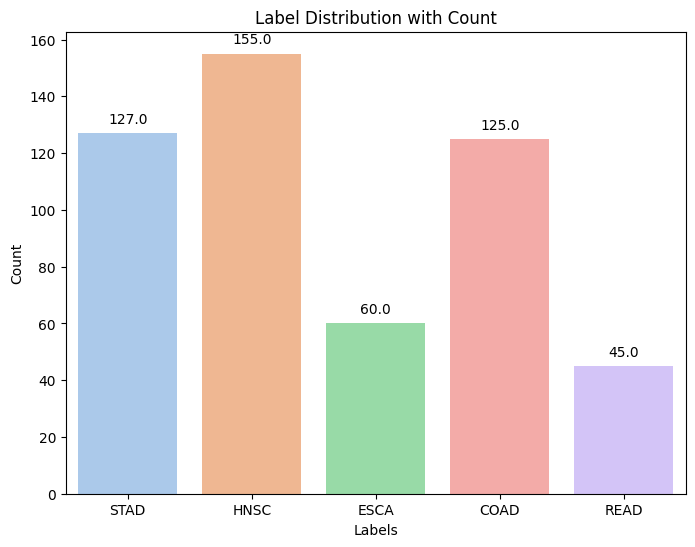

In [79]:
# Using Seaborn for a more visually appealing count plot with annotations
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='label', data=df, palette='pastel')

# Add annotations to display data count on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Label Distribution with Count')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

GREAT JOB! Now that the our data is ready, we will learn how we can use it in different classification approaches. In the next notebook, we will learn about one vs all classification, a technique you can use to handle multiple class classification.